In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rosbag

from scipy.signal import savgol_filter
%matplotlib inline

def wrap_angle(angle):
    return (angle + np.pi) % (2 * np.pi) - np.pi

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
def to_euler(x, y, z, w):
    """Return as xyz (roll pitch yaw) Euler angles."""
    roll = np.arctan2(2 * (w * x + y * z), 1 - 2 * (x**2 + y**2))
    pitch = np.arcsin(2 * (w * y - z * x))
    yaw = np.arctan2(2 * (w * z + x * y), 1 - 2 * (y**2 + z**2))
    return np.array([roll, pitch, yaw])

In [11]:
msg

header: 
  seq: 8703
  stamp: 
    secs: 1596774972
    nsecs: 538008928
  frame_id: "map"
child_frame_id: "base_link"
pose: 
  pose: 
    position: 
      x: 0.010839348313506478
      y: -0.4960484678926796
      z: 2.332028003649553e-13
    orientation: 
      x: 1.5352300785980803e-15
      y: -1.3393747145983517e-15
      z: -0.7692164172827881
      w: 0.638988343698562
  covariance: [2.222792580038317, -4.753675825728559e-14, 1.2358331579834487e-12, 7.646560609043103e-26, -6.794970137184983e-26, -4.7533370249045735e-21, -4.7536758257298516e-14, 2.222792580038292, 4.680773790537265e-12, -9.590369842174718e-26, -8.333917234573875e-26, -5.149736782635326e-19, 1.2358331579834495e-12, 4.680773790537271e-12, 1.757768983225433e-06, -3.858431031499947e-26, -8.592091572827528e-26, 1.3641446671303528e-25, 7.646560609026646e-26, -8.944135460482256e-26, -3.8584479809341835e-26, 1.9990008131329055e-06, 4.604495540765822e-20, -2.1439419642984003e-16, -6.789921426179634e-26, -8.333917239064263

In [4]:
bag = rosbag.Bag('bag_output_ukf_polban0807_02.bag')
bag.get_type_and_topic_info()

TypesAndTopicsTuple(msg_types={'diagnostic_msgs/DiagnosticArray': '60810da900de1dd6ddd437c3503511da', 'dynamic_reconfigure/Config': '958f16a05573709014982821e6822580', 'dynamic_reconfigure/ConfigDescription': '757ce9d44ba8ddd801bb30bc456f946f', 'geometry_msgs/TwistStamped': '98d34b0043a2093cf9d9345ab6eef12e', 'nav_msgs/Odometry': 'cd5e73d190d741a2f92e81eda573aca7', 'rosgraph_msgs/Log': 'acffd30cd6b6de30f120938c17c593fb', 'sensor_msgs/Imu': '6a62c6daae103f4ff57a132d6f95cec2', 'sensor_msgs/NavSatFix': '2d3a8cd499b9b4a0249fb98fd05cfa48', 'sensor_msgs/TimeReference': 'fded64a0265108ba86c3d38fb11c0c16', 'tf2_msgs/TFMessage': '94810edda583a504dfda3829e70d7eec'}, topics={'/diagnostics': TopicTuple(msg_type='diagnostic_msgs/DiagnosticArray', message_count=767, connections=3, frequency=3.8358004961304113), '/fix': TopicTuple(msg_type='sensor_msgs/NavSatFix', message_count=1069, connections=1, frequency=4.9971185848004005), '/gps/filtered': TopicTuple(msg_type='sensor_msgs/NavSatFix', message_co

In [5]:
rpy = []
for topic, msg, t in bag.read_messages(topics=['/odometry/filtered_map']):
    q = msg.pose.pose.orientation
    euler = to_euler(q.x, q.y, q.z, q.w)
    rpy.append(euler)
rpy = np.array(rpy)

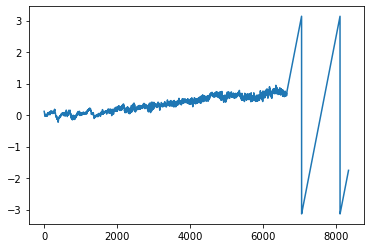

In [10]:
plt.plot(rpy[:, 2])